# HuggingFace NLP Course - Part 1

Course link : [NLP Course](https://huggingface.co/learn/nlp-course/chapter1/1)

### Outline 

- [1 - Transformer Models](#1)
    - [1.1 - What is NLP ?](#1.1)
    - [1.2 - HuggingFace Pipeline and use cases](#1.2)
    - [1.3 - Transformer model pretraining](#1.3)
    - [1.4 - Transformer model characteristics](#1.4)
        - [1.4.1 - Transformer model architecture](#1.4.1)
        - [1.4.2 - Capacity of transfer learning](#1.4.2)
        - [1.4.3 - Carbon footprint](#1.4.3)

- [2 - Using Transformer Models](#2)
    - [2.1 - Behind the pipeline](#2.1)
        - [2.1.1 - Preprocessing with Tokenizers](#2.1.1)
        - [2.1.2 - Passing the input through the model](#2.1.2)
        - [2.1.3 - Postprocessing the output](#2.1.3)
    - [2.2 - Models Implementation](#2.2)
        - [2.2.1 - Model configuration ](#2.2.1)
        - [2.2.2 - Load the model](#2.2.2)
        - [2.2.3 - Save the model](#2.2.3)
    - [2.3 - Tokenization Implementation](#2.3)
        - [2.3.1 - Tokenization algorithms](#2.3.1)
        - [2.3.2 - Load and save tokenizers](#2.3.2)
        - [2.3.3 - Encoding](#2.3.3)
        - [2.3.4 - Decoding](#2.3.4)
    - [2.4 - Handling multiple sequences](#2.4)
        - [2.4.1 - Batching](#2.4.1)
        - [2.4.2 - Padding](#2.4.2)
        - [2.4.3 - Attention masks](#2.4.3)
        - [2.4.4 - Dealing with too long sequences](#2.4.4)
    - [2.5 - All in one block](#2.5)

Download and import `sentencepiece`(tokenizer) and `transformers` (pre-trained transformer-type model).

In [1]:
!pip install transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.2 MB/s eta 0:00:00


In [2]:
import transformers

## Chapter 1. Transformer Models

<a name="1.1"></a>
### 1.1 What is NLP ?
**NLP is a field of linguistics and ML focused on understanding everything related to human language.**

Common NLP tasks :
- Classify whole sentences (sentiment analysis, grammar mistakes detection, spam detection, etc)
- Classify each word in a sentence (example: named entity recognition / NER)
- Generate text content

<a name="1.2"></a>
### 1.2 HuggingFace Pipeline and use cases
Pipeline is an important API in Huggingface for inference that allows us to achieve several tasks using different models.

Some currently available pipelines:
- `feature-extraction` (get the vector representation of a text)
- `fill-mask`
- `ner` (named entity recognition)
- `question-answering`
- `sentiment-analysis`
- `summarization`
- `text-generation`
- `translation`
- `zero-shot-classification`

**Pipeline example 1 : Sentiment analysis**

Here is a very simple for sentiment analysis inference on a sentence.

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("Hello Black orange.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9925547242164612}]

It's totally possible for classifying a list of sentences.

In [4]:
classifier([
    "I've been waiting for Hugging Face for a lifetime",
    "I can't express myself."
])

[{'label': 'POSITIVE', 'score': 0.9928024411201477},
 {'label': 'NEGATIVE', 'score': 0.998254120349884}]

**Pipeline example 2 : Zero-shot-classification pipeline**

Zero-shot means that you insert directly the prompt without passing a prompt-completion example to the model, compared to one-shot that gives one example to the model before the prompt that you expected to get the completion.

`zero-shot-classification` pipeline allows you to specify which labels to use for the classification, so you don’t have to rely on the labels of the pretrained model.



In [5]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445989489555359, 0.11197412759065628, 0.04342695698142052]}

**Pipeline Example 3 : Text generation**

You provide a prompt and the model will auto-complete it by generating the remaining text.

In [6]:
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to use tools such as Ruby or Haskell to build an application using the Java standard library. In the next installment, we will work out how to use tools at various levels of project management and use them to'}]

We can precisely decide max length of completion `max_length` and number of generated completions `num_return_sequences` in pipeline.

In [7]:
generator = pipeline("text-generation", model = "distilgpt2")
generator("In this course, we will teach you how to",
          max_length = 50,
          num_return_sequences = 3
          )

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course, we will teach you how to read more about how to read text and the techniques so you can learn their lessons quickly. If you just start reading, then this course will be perfect for you.'},
 {'generated_text': 'In this course, we will teach you how to apply for a job in an industry of industry at an end-of-life.'},
 {'generated_text': 'In this course, we will teach you how to design and build the best features of your own desktop, laptop, iBooks, tablets, tablets, and other devices. From the first, we will be showing you the basics of using web applications and'}]

**Pipeline Example 4 : Fill mask**

`fill-mask` pipeline can predict a masked word in a sentence, and we add `[MASK]` to represent the masked word.

In this pratical case, however, it's not able to predict the right answer "charming", since the model returns the word with the highest probability.

In [8]:
from transformers import pipeline

filler = pipeline("fill-mask", model="bert-base-cased")
filler("This [MASK] man is a song from British band The Smiths.")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10583526641130447,
  'token': 2869,
  'token_str': 'poor',
  'sequence': 'This poor man is a song from British band The Smiths.'},
 {'score': 0.07045571506023407,
  'token': 1685,
  'token_str': 'young',
  'sequence': 'This young man is a song from British band The Smiths.'},
 {'score': 0.05421442538499832,
  'token': 1385,
  'token_str': 'old',
  'sequence': 'This old man is a song from British band The Smiths.'},
 {'score': 0.03984280303120613,
  'token': 2712,
  'token_str': 'beautiful',
  'sequence': 'This beautiful man is a song from British band The Smiths.'},
 {'score': 0.03432149440050125,
  'token': 2044,
  'token_str': 'dead',
  'sequence': 'This dead man is a song from British band The Smiths.'}]

In [9]:
filler("The British band The Smiths has a famous song called this [MASK] man.")

[{'score': 0.15416498482227325,
  'token': 1385,
  'token_str': 'old',
  'sequence': 'The British band The Smiths has a famous song called this old man.'},
 {'score': 0.05550796911120415,
  'token': 1685,
  'token_str': 'young',
  'sequence': 'The British band The Smiths has a famous song called this young man.'},
 {'score': 0.04334288090467453,
  'token': 1376,
  'token_str': 'little',
  'sequence': 'The British band The Smiths has a famous song called this little man.'},
 {'score': 0.03911015763878822,
  'token': 2044,
  'token_str': 'dead',
  'sequence': 'The British band The Smiths has a famous song called this dead man.'},
 {'score': 0.023587848991155624,
  'token': 4020,
  'token_str': 'strange',
  'sequence': 'The British band The Smiths has a famous song called this strange man.'}]

Let's try with another model RoBERTa, the results are also unwanted.

In [10]:
filler = pipeline("fill-mask", model="xlm-roberta-base")
filler("The British band The Smiths has a famous song called this <mask> man.")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.19348423182964325,
  'token': 10176,
  'token_str': 'little',
  'sequence': 'The British band The Smiths has a famous song called this little man.'},
 {'score': 0.17575792968273163,
  'token': 10332,
  'token_str': 'old',
  'sequence': 'The British band The Smiths has a famous song called this old man.'},
 {'score': 0.10596238821744919,
  'token': 27150,
  'token_str': 'young',
  'sequence': 'The British band The Smiths has a famous song called this young man.'},
 {'score': 0.02881772629916668,
  'token': 1632,
  'token_str': 'one',
  'sequence': 'The British band The Smiths has a famous song called this one man.'},
 {'score': 0.02096688188612461,
  'token': 116666,
  'token_str': 'crazy',
  'sequence': 'The British band The Smiths has a famous song called this crazy man.'}]

<a name="1.3"></a>

#### 1.3 - Transformer model pretraining

**The pretraining process is usually self-supervised**, which means the labels are created automatically from the inputs (like predicting next word or filling in some masked words). Therefore, a language model usually does not need labels for its pretraining.

Other than that, **pretraining is the act of training a model from scratch** : weights are randomly initialized, and the training starts without any prior knowledge.

<a name="1.4"></a>

### 1.4 - Transformer model characteristics

<a name="1.4.1"></a>
#### 1.4.1 Encoder / decoder based architecture

Broadly, transformer models are language models that can be divided to three categories in terms of their architecture :

- **Decoder models (also called auto-regressive transformer models)**. Model Examples : CTRL, GPT, GPT-2, Transformer XL.
  - Decoder models use only the decoder of a transformer model. At each stage, for a given word the attention layers can only access the words positioned before it.
  - The pretraining of decoder models usually revolves around predicting the next word in the sentence. Therefore, they are best suited for text generation tasks.

- **Encoder models (also called Auto-encoding Transformer models)**. Model Examples : ALBERT, BERT, DistilBERT, ELECTRA, RoBERTa.
  - Encoder models use only the encoder of a Transformer model. At each stage, the attention layers can access all the words in the initial sentence. These models are often characterized as having bidirectional attention.
  - The pretraining of encoder models usually revolves around corrupting a given sentence (for instance, by masking random words in it) and tasking the model with finding or reconstructing the initial sentence.
  - Encoder models are best suited for tasks requiring an understanding of the full sentence, such as sentence classification, named entity recognition (and more generally word classification), and extractive question answering.

- **Encoder-decoder models (also called sequence-to-sequence Transformer models/ seq2seq models)**. Example models : BART, mBART, Marian, T5.
  - Encoder-decoder models use both encoder and decoder of the Transformer architecture. At each stage, the attention layers of the encoder can access all the words in the initial sentence, whereas the attention layers of the decoder can only access the words positioned before a given word in the input.

  - The pretraining of these models can be done using the objectives of encoder or decoder models, but usually involves something a bit more complex. For instance, T5 is pretrained by replacing random spans of text (that contain several words) with a single mask special word, the objective is then to predict the text that this mask word replaces.

  - Sequence-to-sequence models are best suited for tasks revolving around generating sentences depending on a given input, such as text summarization, translation, or generative question answering.

<a name="1.4.2"></a>

#### 1.4.2 Capacity of transfer learning

Transformer models develop a statistical understanding of the language it has been trained on, yet not very useful for specific practical tasks. Because of this, the general pretrained model then goes through a process called **transfer learning**. During this process, the model is fine-tuned in a supervised way, using human-annotated labels on a given task.

Old deeping learning methods like RNN, LSTM applied to NLP tasks are not able to make transfer learning possible, which means that we always need new data to train a model specific to a task or some tasks.

An example of a task is predicting the next word in a sentence having read the n previous words. This is called causal language modeling because the output depends on the past and present inputs, but not the future ones.


<a name="1.4.3"></a>
#### 1.4.3 Carbon footprint of Transformers

Training a model requires a lot of amount of data, it can be very costly in terms of time and compute resources. It can translate to environmental impact which leads to emit much $CO_2$.

<a name="2"></a>
## Chapter 2. Using Transformer Models

<a name="2.1"></a>
### 2.1 Behind the pipeline

The pipeline groups together three steps:
1. Preprocessing with tokenizers (tokenization)
2. Passing the tokens through the model
3. Postprocessing

Here is a diagram explaining the whole process:

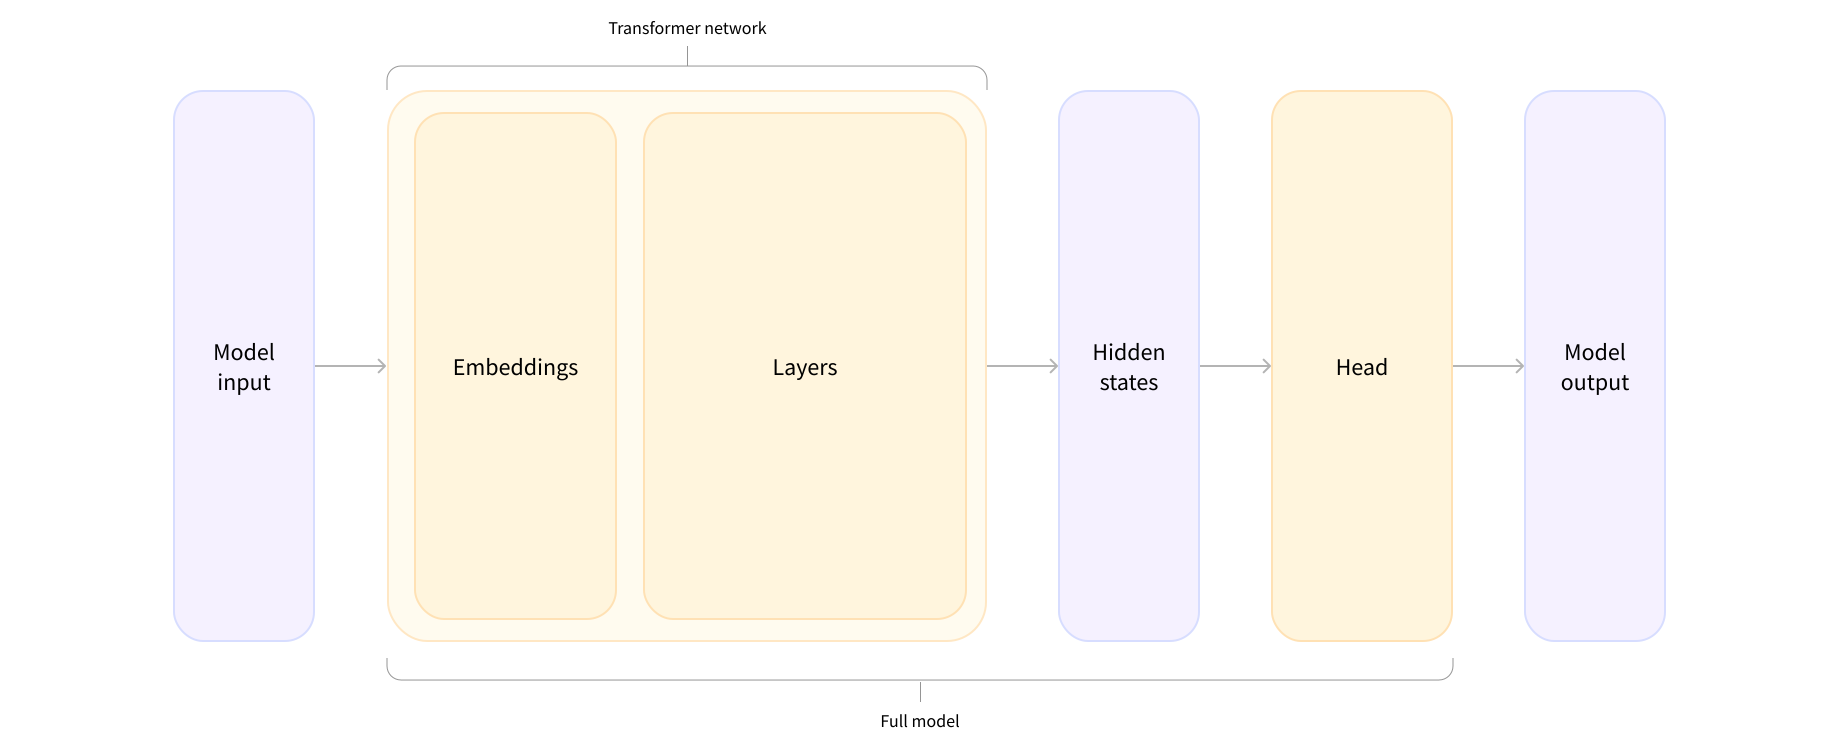

In [11]:
from IPython.display import SVG, display

display(SVG(url='https://huggingface.co/datasets/huggingface-course/documentation-images/resolve/main/en/chapter2/transformer_and_head.svg'), )


<a name="2.1.1"></a>

#### 2.1.1 - Preprocessing with tokenizers

- Input : raw text
- Output : word embeddings (`input_id`, `attention_mask`)

The embedding layer converts each token in the tokenized input into a vector (1-dimension Tensor) that represents the associated token.

In [12]:
from transformers import AutoTokenizer
import pprint

# checkpoint : weights trained by the model
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "Ben's mother, Felicity, gave me a present. ",
    "Don’t worry about padding and truncation just yet."
]

inputs = tokenizer(raw_inputs, padding = True, truncation = True, return_tensors = "pt")
print(inputs)

{'input_ids': tensor([[  101,  3841,  1005,  1055,  2388,  1010, 27357,  1010,  2435,  2033,
          1037,  2556,  1012,   102,     0,     0],
        [  101,  2123,  1521,  1056,  4737,  2055, 11687,  4667,  1998, 19817,
          4609, 10719,  2074,  2664,  1012,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


<a name="2.1.2"></a>

#### 2.1.2 Passing the inputs through the model

- Input : `input_id`
- Output (also as Transformer output) : Hidden states / features / numerical representations.

In this step, attention mechanism is used to produce the final representation of sentences taking the context into consideration.

In [13]:
# The AutoModel API allows to instantiate a pretrained model from any checkpoint
from transformers import AutoModel

model = AutoModel.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[ 0.4398,  0.3119,  0.6714,  ...,  0.5635,  0.5028, -0.5060],
         [ 0.4211,  0.4358,  1.0047,  ...,  0.4800,  0.6122, -0.6067],
         [ 0.5149,  0.4332,  1.1564,  ...,  0.5958,  0.5926, -0.9055],
         ...,
         [ 0.5650,  0.4027,  0.6743,  ...,  0.7532,  0.5610, -0.6045],
         [ 0.3567,  0.4003,  1.2120,  ...,  0.7410,  0.2952, -0.3738],
         [ 0.0760,  0.3902,  0.6942,  ...,  0.8641,  0.3587, -0.1219]],

        [[ 0.8579,  0.0906,  0.5529,  ...,  0.6129,  0.4326,  0.1789],
         [ 1.1775, -0.0137,  0.4496,  ...,  0.7302,  0.5562, -0.1388],
         [ 0.9034, -0.0251,  1.1449,  ...,  0.4530,  0.3500, -1.0006],
         ...,
         [ 1.0465, -0.1026,  0.1513,  ...,  0.5946,  0.2787,  0.2206],
         [ 1.2375,  0.2103,  0.4106,  ...,  0.9552,  0.4213, -0.4853],
         [ 1.2239,  0.4605,  0.6581,  ...,  1.1160,  0.4809, -0.2936]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)


Output is a tensor of 3 dimensions :

**batch size** * **sequence length** (which is the length of the longest sentence in whole input sentences) * **hidden state size** (here 768, which is a vector of 768 elements representing the sentence).

In [14]:
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


**Model head**
- Input : hidden states
- Output : a tensor which dimension number correspond to different tasks, suck as:

  * Model (retrieve the hidden states)
  * ForCausalLM
  * ForMaskedLM
  * ForMultipleChoice
  * ForQuestionAnswering
  * ForSequenceClassification
  * ForTokenClassification
  * and others 🤗

  For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So we won’t actually use the `AutoModel` class, but `AutoModelForSequenceClassification`:

In [15]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)
print(outputs)

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7357,  3.9617],
        [-2.1433,  2.0994]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [16]:
print(outputs.logits.shape)

torch.Size([2, 2])


In [17]:
print(outputs.logits)

tensor([[-3.7357,  3.9617],
        [-2.1433,  2.0994]], grad_fn=<AddmmBackward0>)


<a name="2.1.3"></a>

#### 2.1.3 Postprocessing the output

The output from the model is logits, which is raw and unormalized scores by the last layer of the model. To be converted to probabilities, they need to go through a softmax layer.

In [18]:
import torch
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[4.5378e-04, 9.9955e-01],
        [1.4166e-02, 9.8583e-01]], grad_fn=<SoftmaxBackward0>)


To get the labels corresponding to each position, we can inspect the id2label attribute of the model config.

In [19]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

<a name="2.2"></a>

### 2.2 Model Implementation

In this part, we take a closer look at how to use transformer model in HuggingFace. We can instantiate a model from checkpoint using `AutoModel` class. The `AutoModel` class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It’s a clever wrapper as it **can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture**. However, if you know the type of model you want to use, you can use the class that defines its architecture directly.

<a name="2.2.1"></a>

#### 2.2.1 Model configuration
The `AutoConfig` API allows you to instantiate a configuration of pretrained model from any checkpoint. The configuration contains all the information needed to load the model.

In [20]:
# Creating a model from the default configuration initializes it with random values
from transformers import BertConfig, BertModel

config = BertConfig()
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.34.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



<a name="2.2.2"></a>

#### 2.2.2 Load the model

Now, let's load a Transformer model that is already trained. In the code sample below we didn't use `BertConfig`, and instead loaded a pretrained model via the `bert-base-cased` identifier. This is a model checkpoint trained by the authors of BERT.

This model is now initialized with all the weights of the checkpoint. It can be used directly for inference on the tasks it was trained on, and it can also be fine-tuned on a new task. By training with pretrained weights rather than from scratch, we can quickly achieve good results.

In [21]:
from transformers import BertModel
model = BertModel.from_pretrained("bert-base-cased")

<a name="2.2.3"></a>

#### 2.2.3 Save the model

In [22]:
model.save_pretrained("directory_on_my_computer")

In [23]:
! ls directory_on_my_computer

config.json  pytorch_model.bin


- `config.json` : model architecture
- `pytorch_model.bin` :  state dictionary, it contains all model's weights.

Here is an easy training example.

In [24]:
# a numerical sequence (we ignore tokenization process here)
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

# transform to tensors
model_inputs = torch.tensor(encoded_sequences)

# pass the transformed tensor to the model
output = model(model_inputs)

In [25]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9394e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1970e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0111e-02,
           3.2451e-01, -2.0995e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4877e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1079e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1320e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2

<a name="2.3"></a>

### 2.3 Tokenization Implementation
Tokenizers are one of the core components of NLP pipelines. They takes input sentences to produce embedding (numerical representation) of each token in the sentences.


<a name="2.3.1"></a>

#### 2.3.1 Tokenization Implementation
They are different tokenization algorithms:
- **word-based** : split the raw text into words.
- **character-based** :  split the text into characters, rather than words.
- **subword tokenization** : based on words but rare words should be decomposed into meaningful subwords.

Different tokenizers may have different ways to define special tokens, for example, BERT has `<CLS>` and `<SEP>` while RoBERTa uses `<s>` and `</s>` to mark a sentence.

<a name="2.3.2"></a>

#### 2.3.2 Load and save tokenizers

In [26]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

In [27]:
# the same way using AutoTokenizer
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [28]:
# tokenizer.save_pretrained("directory_on_my_computer")

<a name="2.3.3"></a>

#### 2.3.3 Encoding
Encoding is to translate text to numbers.
- Step 1. tokenization : split the text into words, which we called tokens.
- Step 2. convert tokens to input ids : to do this, the tokenizer has a vocabulary, which is the part we download when we instantiate it with the `from_pretrained()` method. We need to use the same vocabulary used when the model was pretrained.

In [29]:
# step 1 : tokenization
tokens = tokenizer.tokenize("Using a Transformer network is simple")
print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [30]:
# step 2 : convert tokens to input ids
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


In practice, we can call tokenizer directly to archieve encoding.

In [31]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

These outputs, once converted to the appropriate framework tensor, can then be used as inputs to a model.

<a name="2.3.4"></a>

#### 2.3.4 Decoding

The decoding converts the vocabulary indices back to tokens, but also groups together the tokens that were part of the same words to produce a readable sentence.

In [32]:
decoded_string = tokenizer.decode([101, 7993, 170, 11303, 1200, 2443, 1110, 3014, 102])
print(decoded_string)

[CLS] Using a transformer network is simple [SEP]


Let's try with another tokenizer.

In [33]:
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
tokens = tokenizer.tokenize("Using a Transformer network is simple")
print(tokens)

['▁U', 'sing', '▁a', '▁Trans', 'former', '▁network', '▁is', '▁simple']


In [34]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[345, 6953, 10, 11062, 82772, 33120, 83, 8781]


`input_id` in the vocabulary :
- `<s>` : 0
- `</s>` : 2


In [35]:
decoded_string = tokenizer.decode([0, 345, 6953, 10, 11062, 82772, 33120, 83, 8781, 2])
print(decoded_string)

<s> Using a Transformer network is simple</s>


<a name="2.4"></a>

### 2.4 Handling multiple sequences

**Transformers models expect multiple sentences by default**. Therefore, when you insert a single sequence to the model, you need to add a new dimension to get the result by `torch.tensor([ids])`.

In [36]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


<a name="2.4.1"></a>

#### 2.4.1 Batching

Batching is the act of sending multiple sentences through the model, all at once. If you only have one sentence, you can just build a batch with a single sequence:

In [37]:
batched_ids = [ids, ids]
batched_ids

[[1045,
  1005,
  2310,
  2042,
  3403,
  2005,
  1037,
  17662,
  12172,
  2607,
  2026,
  2878,
  2166,
  1012],
 [1045,
  1005,
  2310,
  2042,
  3403,
  2005,
  1037,
  17662,
  12172,
  2607,
  2026,
  2878,
  2166,
  1012]]

Batching allows the model to work when you feed it multiple sentences. Using multiple sequences is just as simple as building a batch with a single sequence. However, when you’re trying to batch together two (or more) sentences, they might be of different lengths. To work around this problem, we usually **pad the inputs**.

<a name="2.4.2"></a>

#### 2.4.2 Padding

**Padding makes sure all our sentences have the same length by adding a special word called the padding token to the sentences with fewer values.** For example, if you have 10 sentences with 10 words and 1 sentence with 20 words, padding will ensure all the sentences have 20 words. The padding token ID can be found in `tokenizer.pad_token_id`.



In [38]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


In the logits of batched prediction, there is a difference between the second row and the sequence 2 logits. This is because the attention layers of Transformer Model contextualize each token which take padding token into count. To avoid this, we need to tell these attention layers to ignore padding tokens by using **attention masks**.

<a name="2.4.3"></a>

#### 2.4.3 Attention Masks

Attention masks are tensors with the same shape as the input IDs tensors, but filled with 0 and 1.
- 0: corresponding tokens should be ignored.
- 1: corresponding tokens should be considered.

Let's try with the same example below by adding attention mask.

In [39]:
attention_mask = [
    [1,1,1],
    [1,1,0]
]

outputs = model(torch.tensor(batched_ids), attention_mask = torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


Now we get the results expected.

<a name="2.4.4"></a>

#### 2.4.4 Dealing with too long sequences

With Transformer models, there is a limit to the lengths of the sequences we can pass the models. Most models handle sequences of up to 512 or 1024 tokens, and will crash when asked to process longer sequences. There are two solutions to this problem:

- Use a model with a longer supported sequence length : Longformer / LED
- Truncate your sequences by specifying `max_sequence_length` parameter.

<a name="2.5"></a>

### 2.5 All in one block

You can specify different parameters in the tokenizer :
- **Padding** : `padding="longest"` / `padding="max_length"` with specified max length
- **Truncate sequences** : `trucation = only_second` / `trucation = True` with specified max length, etc
- **Return tensors** : `pt`, `tf`, `np`


The tokenizer added the special word `[CLS]` at the beginning and the special word `[SEP]` at the end. This is because the model was pretrained with those, so to get the same results for inference we need to add them as well.

In [40]:
sequence = "I've been waiting for a HuggingFace course my whole life."

# tokenization and generate input ids
model_inputs = tokenizer(sequence)
print("Input ids with special tokens: ", model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print("IDs of original sequence:", ids)

print("Decode input ids with special tokens: ", tokenizer.decode(model_inputs["input_ids"]))
print("Decode input ids: ", tokenizer.decode(ids))

Input ids with special tokens:  [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
IDs of original sequence: [1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]
Decode input ids with special tokens:  [CLS] i've been waiting for a huggingface course my whole life. [SEP]
Decode input ids:  i've been waiting for a huggingface course my whole life.


**From Tokenizer to Model**

In [41]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)